In [97]:
#library and data imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import DBSCAN
import geopandas as gp
import shapely
import shapefile
import plotly.figure_factory as ff
import plotly 
import geopandas as gp
import shapely
import shapefile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
import plotly.figure_factory as ff
demographics_test = pd.read_csv('demographics_test.csv')
merged_train = pd.read_csv('merged_train.csv')
X = merged_train[['State','County','FIPS','Total Population', 'Percent White, not Hispanic or Latino',
                  'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born',
                  'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income',
                  'Percent Unemployed', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree',
                  'Percent Rural']]



Y = merged_train[['Democratic','Republican','Party']]

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.75, test_size=0.25, random_state=0)

In [99]:
scaler = StandardScaler()
scaler.fit(x_train[['Total Population', 'Percent White, not Hispanic or Latino',
                  'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born',
                  'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income',
                  'Percent Unemployed', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree',
                  'Percent Rural']])
x_train_scaled = scaler.transform(x_train[['Total Population', 'Percent White, not Hispanic or Latino',
                  'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born',
                  'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income',
                  'Percent Unemployed', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree',
                  'Percent Rural']])
x_test_scaled = scaler.transform(x_test[['Total Population', 'Percent White, not Hispanic or Latino',
                  'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born',
                  'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income',
                  'Percent Unemployed', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree',
                  'Percent Rural']])
#print(x_train_scaled)

**3. Build a linear regression model to predict the number of votes cast for the Democratic party in each county. Consider multiple combinations of predictor variables.Compute evaluation metrics for the validation set and report your results.**

In [100]:
#Simple linear regression using 'Population' as predictor to predict Democratic votes.

from sklearn import linear_model
import numpy

n = len(x_train) #Number of observations in the training set

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, 0].reshape(-1, 1), y = y_train['Democratic'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled[:, 0].reshape(-1, 1))

corr_coef = numpy.corrcoef(predicted,y_test['Democratic'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - 1 - 1))
print(adj_R_squared)

#print(x_train.info())

[74711.50206856] 27569.373883928572
0.9435784812901373


In [101]:
#Simple linear regression using 'Percent Less than High School Degree' as predictor to predict Democratic votes.

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, 10].reshape(-1, 1), y = y_train['Democratic'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled[:, 10].reshape(-1, 1))

corr_coef = numpy.corrcoef(predicted,y_test['Democratic'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - 1 - 1))
print(adj_R_squared)

[-8137.73810376] 27569.373883928572
0.02164134183638411


In [102]:
#Multiple linear regression using "Population", "Median Household Income" as predictor to predict Democratic votes.

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, [0,8]], y = y_train['Democratic'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled[:, [0,8]])


corr_coef = numpy.corrcoef(predicted,y_test['Democratic'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - 2 - 1))
print(adj_R_squared)

[73067.37334453  6279.76422366] 27569.37388392857
0.939201701208693


In [103]:
#Multiple linear regression using "Population", "Median Household Income","Percent white, not hispanic or latino",
#"Percent Less than Bachelor's degree" as predictor to predict Democratic votes.

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, [0,1,8,11]], y = y_train['Democratic'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled[:, [0,1,8,11]])

corr_coef = numpy.corrcoef(predicted,y_test['Democratic'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - 4 - 1))
print(adj_R_squared)

[71012.84796525  -345.05366382  1157.04687807 -8608.17042826] 27569.37388392857
0.9474994738338731


In [104]:
#Multiple linear regression using all predictor to predict Democratic votes.

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled, y = y_train['Democratic'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled)

corr_coef = numpy.corrcoef(predicted,y_test['Democratic'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - len(x_train.columns) - 1))
print(adj_R_squared)

[ 69224.38708039  -3209.1591268   -1023.23488454  -6931.14708179
   3973.74580741    194.19056985  -5299.5676761   -1853.22320472
   1471.25963216   1467.0213699    4037.7699931  -10519.02638282
   -158.13004477] 27569.37388392856
0.9326318491941099


**What is the best performing linear regression model? What is the performance of the model? How did you select the variables
of the model?**

**Answer:** The best performing linear Regression model is Multiple linear Regression model using "Population", "Median Household Income","Percent white, not hispanic or latino", "Percent Less than Bachelor's degree" as predictor. The model perform well with these four predictors with adjusted R square value = 0.947. Selection of the varible is consistant with Project 1 conclusion and also on present analysis as we see here the adjusted R square value decreases if we consider all variables as predictors.

**Build a linear regression model to predict the number of votes cast for the Republican party in each county. Consider multiple combinations of predictor variables.Compute evaluation metrics for the validatiRepublicanon set and report your results.**

In [105]:
#Simple linear regression using 'Population' as predictor to predict Republican votes.

from sklearn import linear_model
import numpy

n = len(x_train) #Number of observations in the training set

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, 0].reshape(-1, 1), y = y_train['Republican'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled[:, 0].reshape(-1, 1))

corr_coef = numpy.corrcoef(predicted,y_test['Republican'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - 1 - 1))
print(adj_R_squared)


[45306.87897032] 21546.910714285714
0.6714797544800217


In [106]:
#Simple linear regression using 'Percent Less than High School Degree' as predictor to predict Republican votes.

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, 10].reshape(-1, 1), y = y_train['Republican'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled[:, 10].reshape(-1, 1))

corr_coef = numpy.corrcoef(predicted,y_test['Republican'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - 1 - 1))
print(adj_R_squared)


[-6381.7748349] 21546.910714285714
0.03485762203356779


In [107]:
#Multiple linear regression using "Population", "Median Household Income" as predictor to predict Republican votes.

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, [0,8]], y = y_train['Republican'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled[:, [0,8]])


corr_coef = numpy.corrcoef(predicted,y_test['Republican'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - 2 - 1))
print(adj_R_squared)

[44042.16950014  4830.56902305] 21546.91071428571
0.6834161715428404


In [108]:
#Multiple linear regression using "Population", "Median Household Income","Percent white, not hispanic or latino",
#"Percent Less than Bachelor's degree" as predictor to predict Republican votes.

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, [0,1,8,11]], y = y_train['Republican'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled[:, [0,1,8,11]])

corr_coef = numpy.corrcoef(predicted,y_test['Republican'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - 4 - 1))
print(adj_R_squared)

[44609.62027579  3068.87458444  3337.02252553 -2140.80688346] 21546.910714285714
0.6823641418975455


In [109]:
#Multiple linear regression using all predictor to predict Republican votes.

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled, y = y_train['Republican'])
print(model.coef_ , model.intercept_)

predicted = fitted_model.predict(x_test_scaled)

corr_coef = numpy.corrcoef(predicted,y_test['Republican'])[1, 0]
R_squared = corr_coef ** 2

adj_R_squared = 1 - ((1 - R_squared)*(n - 1)/(n - len(x_train.columns) - 1))
print(adj_R_squared)

[45467.5097118   1769.95034533 -3141.42063749  1167.17323402
 -6463.65917143 -1121.73432851  -955.67013341  2580.74056065
  5910.97457236  2037.10575397  3530.42010898 -3156.11275644
 -5992.05181735] 21546.910714285706
0.7188757514038702


**What is the best performing linear regression model? What is the performance of the model? How did you select the variables
of the model?**

**Answer:** The best performing linear Regression model while prediction Republican votes is Multiple linear Regression model using all veriables as predictor. The model does not perform too well with maximum adjusted R square value = 0.719.
All the variables are selected for the model as it gives the best adjusted R square value.

**Task 4**

Decision tree classifier with no random state and variables 'Total Population', 'Percent White', and 'Percent Rural'

Number of decision tree nodes:  347
Accuracy:  0.7224080267558528
Error:  0.2775919732441472
Precision:  [0.8173516 0.4625   ]
Recall:  [0.80630631 0.48051948]
F1 score:  [0.81179138 0.47133758]




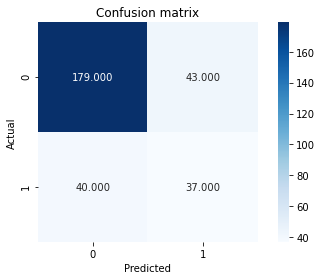

In [110]:
#Using decision tree classifier to classify each county as either Democratic or Republican 

'''
First run with no random state and using variables "Total Population", 
"Percent White, not Hispanic or Latino", and "Percent Rural"

'''

classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
print("Decision tree classifier with no random state and variables 'Total Population', 'Percent White', and 'Percent Rural'\n")
classifier.fit(x_train_scaled[:, [0,1, 12]], y_train['Party'])

print("Number of decision tree nodes: ", len(classifier.tree_.__getstate__()['nodes']))

#predicting Party labels for the test set using decision tree classifier 
y_predicted = classifier.predict(x_test_scaled[:, [0,1, 12]])
conf_matrix = metrics.confusion_matrix(y_test['Party'], y_predicted)

# print confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# print out Evaluation metrics for valudation set
accuracy = metrics.accuracy_score(y_test['Party'], y_predicted)
error = 1 - metrics.accuracy_score(y_test['Party'], y_predicted)
precision = metrics.precision_score(y_test['Party'], y_predicted, average = None)
recall = metrics.recall_score(y_test['Party'], y_predicted, average = None)
F1_score = metrics.f1_score(y_test['Party'], y_predicted, average = None)

print("Accuracy: ", accuracy)
print("Error: ", error)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", F1_score)
print("\n")


Decision tree classifier with random state and variables 'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree' and 'Percent Less than Bachelor's Degree'

Number of decision tree nodes:  309
Accuracy:  0.7123745819397993
Error:  0.2876254180602007
Precision:  [0.79824561 0.43661972]
Recall:  [0.81981982 0.4025974 ]
F1 score:  [0.80888889 0.41891892]




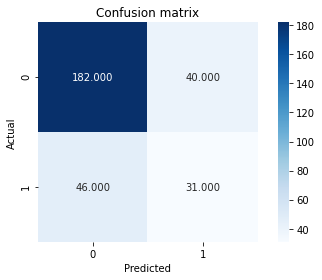

In [111]:
#Decision tree continued
'''
Second run using random state and using variables 'Median Household Income', 'Percent Unemployed',
'Percent Less than High School Degree', 'Percent Less than Bachelor's Degree'

'''
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 1)
print("Decision tree classifier with random state and variables 'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree' and 'Percent Less than Bachelor's Degree'\n")
classifier.fit(x_train_scaled[:, [8,9, 10, 12]], y_train['Party'])

print("Number of decision tree nodes: ", len(classifier.tree_.__getstate__()['nodes']))

#predicting Party labels for the test set using decision tree classifier 
y_predicted = classifier.predict(x_test_scaled[:, [8,9, 10, 12]])
conf_matrix = metrics.confusion_matrix(y_test['Party'], y_predicted)

# print confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# print out Evaluation metrics for valudation set
accuracy = metrics.accuracy_score(y_test['Party'], y_predicted)
error = 1 - metrics.accuracy_score(y_test['Party'], y_predicted)
precision = metrics.precision_score(y_test['Party'], y_predicted, average = None)
recall = metrics.recall_score(y_test['Party'], y_predicted, average = None)
F1_score = metrics.f1_score(y_test['Party'], y_predicted, average = None)

print("Accuracy: ", accuracy)
print("Error: ", error)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", F1_score)
print("\n")

For our first run the decision tree classifier predicts party with precision of 46.25%, recall of 48.05%, and F1 Score of 46.13%. Our second run (with the random state) predicts party with precision of 43.66%, recall of 40.26%, and F1 Score of 41.89%. 

The first classifier does a better job predicting party.

Naive Bayes classifier with variables 'Total Population', 'Percent White', and 'Percent Rural'

Accuracy:  0.7892976588628763
Error:  0.21070234113712372
Precision:  [0.8244898  0.62962963]
Recall:  [0.90990991 0.44155844]
F1 score:  [0.86509636 0.51908397]




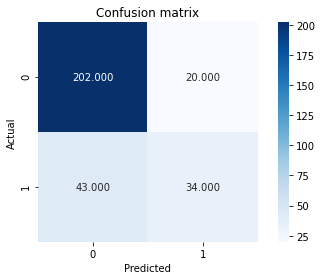

In [112]:
#Using a Naive Bayes classifier to classify each county as either Democratic or Republican 


'''
First run using variables "Total Population", "Percent White, not Hispanic or Latino", and "Percent Rural"
There are no parameters for Gaussian NB other than var_smoothing which we opted out from using
'''

#no parameters for Gaussian NB
classifier = GaussianNB()
print("Naive Bayes classifier with variables 'Total Population', 'Percent White', and 'Percent Rural'\n")
classifier.fit(x_train_scaled[:, [0,1, 12]], y_train['Party'])

#predicting Party labels for the test set using NB
y_predicted = classifier.predict(x_test_scaled[:, [0,1, 12]])
conf_matrix = metrics.confusion_matrix(y_test['Party'], y_predicted)

# print confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# print out Evaluation metrics for valudation set
accuracy = metrics.accuracy_score(y_test['Party'], y_predicted)
error = 1 - metrics.accuracy_score(y_test['Party'], y_predicted)
precision = metrics.precision_score(y_test['Party'], y_predicted, average = None)
recall = metrics.recall_score(y_test['Party'], y_predicted, average = None)
F1_score = metrics.f1_score(y_test['Party'], y_predicted, average = None)

print("Accuracy: ", accuracy)
print("Error: ", error)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", F1_score)
print("\n")

Naive Bayes classifier with variables 'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree' and 'Percent Less than Bachelor's Degree'

Accuracy:  0.7625418060200669
Error:  0.23745819397993306
Precision:  [0.81327801 0.55172414]
Recall:  [0.88288288 0.41558442]
F1 score:  [0.84665227 0.47407407]




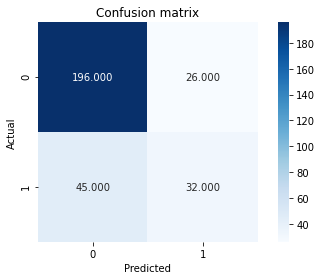

In [113]:
#NB continued
'''
Second run using variables 'Median Household Income', 'Percent Unemployed',
'Percent Less than High School Degree', 'Percent Less than Bachelor's Degree'
'''

#no parameters for Gaussian NB
classifier = GaussianNB()
print("Naive Bayes classifier with variables 'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree' and 'Percent Less than Bachelor's Degree'\n")
classifier.fit(x_train_scaled[:, [8,9, 10, 12]], y_train['Party'])

#predicting Party labels for the test set using NB
y_predicted = classifier.predict(x_test_scaled[:, [8,9, 10, 12]])
conf_matrix = metrics.confusion_matrix(y_test['Party'], y_predicted)



# print confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# print out Evaluation metrics for valudation set
accuracy = metrics.accuracy_score(y_test['Party'], y_predicted)
error = 1 - metrics.accuracy_score(y_test['Party'], y_predicted)
precision = metrics.precision_score(y_test['Party'], y_predicted, average = None)
recall = metrics.recall_score(y_test['Party'], y_predicted, average = None)
F1_score = metrics.f1_score(y_test['Party'], y_predicted, average = None)

print("Accuracy: ", accuracy)
print("Error: ", error)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", F1_score)
print("\n")

For our first run the Naive Bayes classifier predicts party with precision of 62.96%, recall of 44.15%, and F1 Score of 51.91%. Our second run predicts party with precision of 55.17%, recall of 41.55%, and F1 Score of 47.41%. 

The first classifier does a better job predicting party.

**What is the best performing classification model? What is the performance of the model? How did you select the parameters of the model? How did you select the variables of the model?**

**Answer:** The best performing classification model is the Naive Bayes classifier using variables 'Total Population', 'Percent White', and 'Percent Rural'. It had an accuracy of 78.93% and the most True Positive values out of all 4 classifiers used. It also was the best in terms of evaluation metrics with precision of 62.96%, recall of 44.15%, and F1 Score of 51.91%.  The variables were selected because they gave the best indicator of a Republican county (a rural place with smaller populations and a white demographic). The model had no parameters because we did not want to use var_smoothing and there was nothing else to change. 

**Task 5**


Hierarchical clustering with complete linkage, euclidean distance metric and using variables 'Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'

Supervised metric:  0.05057355502877359
Unsupervised metric:  0.64412187209008


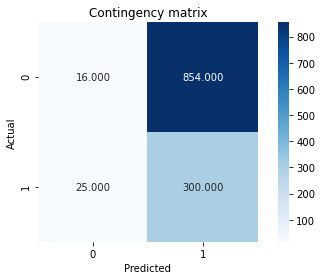

In [114]:
# Clustering the counties and evaluating the clusters found using Hierarchical clustering

'''
First run: Hierarchical clustering with complete linkage and using variables 'Percent White, not Hispanic or Latino',
'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'
'''

X_cluster = merged_train[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']]
scaler = StandardScaler()
scaler.fit(X_cluster)
X_scaled_c = scaler.transform(X_cluster)

print("Hierarchical clustering with complete linkage, euclidean distance metric and using variables 'Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'\n")


# we can use Y_Party from previous tests
clustering = linkage(X_scaled_c, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

# print contingency matrix

cont_matrix = metrics.cluster.contingency_matrix(Y['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# print out unsupervised and supervised evaluation metrics 
adjusted_rand_index = metrics.adjusted_rand_score(Y['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled_c, clusters, metric = "euclidean")
print("Supervised metric: ", adjusted_rand_index)
print("Unsupervised metric: ", silhouette_coefficient)



Hierarchical clustering with complete linkage, jaccard distance metric and using variables 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed'

Supervised metric:  0.09223396339355758
Unsupervised metric:  0.37214725289194917


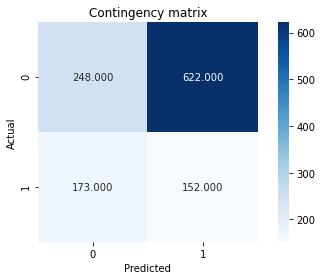

In [115]:
# Hierarchical clustering continued

'''
Second run: Hierarchical clustering with complete linkage and using variables 'Percent Female', 
'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed'
'''

X_cluster = merged_train[['Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed']]
scaler = StandardScaler()
scaler.fit(X_cluster)
X_scaled_c = scaler.transform(X_cluster)

print("Hierarchical clustering with complete linkage, jaccard distance metric and using variables 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed'\n")


# we can use Y_Party from previous tests
clustering = linkage(X_scaled_c, method = "complete", metric = "cosine")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

# print contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(Y['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# print out unsupervised and supervised evaluation metrics 
adjusted_rand_index = metrics.adjusted_rand_score(Y['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled_c, clusters, metric = "cosine")
print("Supervised metric: ", adjusted_rand_index)
print("Unsupervised metric: ", silhouette_coefficient)


The first Heirarchical clustering had the best performance with an unsupervised metric of 64.41%

DBSCAN clustering with eps = .5, min_samples = 15 and using variables 'Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'

Supervised metric:  0.12908114450483138
Unsupervised metric:  0.5786850122739186


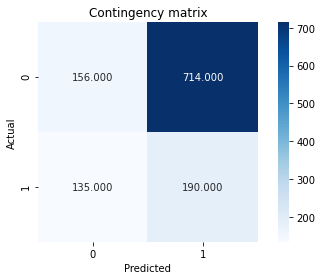

In [116]:
# Clustering using DBScan

'''
First run: DBSCAN with eps = .5, min_samples = 15 and using variables 'Percent White, not Hispanic or Latino',
'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'
'''

X_cluster = merged_train[['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born']]
scaler = StandardScaler()
scaler.fit(X_cluster)
X_scaled_c = scaler.transform(X_cluster)

print("DBSCAN clustering with eps = .5, min_samples = 15 and using variables 'Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'\n")

clustering = DBSCAN(eps = .5, min_samples = 15, metric = "euclidean").fit(X_scaled_c)
clusters = clustering.labels_

# print contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(Y['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# print out unsupervised and supervised evaluation metrics 
adjusted_rand_index = metrics.adjusted_rand_score(Y['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled_c, clusters, metric = "euclidean")
print("Supervised metric: ", adjusted_rand_index)
print("Unsupervised metric: ", silhouette_coefficient)


DBSCAN clustering with eps = 1, min_samples = 10 and using variables 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed'

Supervised metric:  0.008381757165266535
Unsupervised metric:  0.2213462398681104


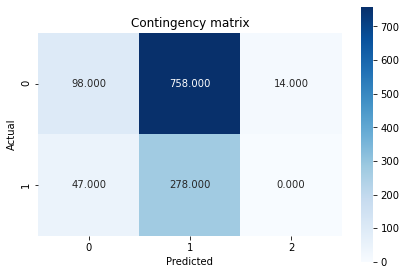

In [117]:
# DBSCAN continued

'''
Second run: DBSCAN with eps = 1, min_samples = 10 and using variables 'Percent Female', 
'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed'
'''


X_cluster = merged_train[['Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed']]
scaler = StandardScaler()
scaler.fit(X_cluster)
X_scaled_c = scaler.transform(X_cluster)

print("DBSCAN clustering with eps = 1, min_samples = 10 and using variables 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Median Household Income', 'Percent Unemployed'\n")


clustering = DBSCAN(eps = 1, min_samples = 10, metric = "euclidean").fit(X_scaled_c)
clusters = clustering.labels_

# print contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(Y['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

# print out unsupervised and supervised evaluation metrics 
adjusted_rand_index = metrics.adjusted_rand_score(Y['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled_c, clusters, metric = "euclidean")
print("Supervised metric: ", adjusted_rand_index)
print("Unsupervised metric: ", silhouette_coefficient)


The first DBSCAN clustering had the better performance with an unsupervised metric of 57.87%. 

**What is the best performing clustering model? What is the performance of the model? How did you select the parameters of model? How did you select the variables of the model?**

Answer: The best performing model was Heirarchical clustering with complete linkage and variables 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Foreign Born'. It had an unsupervised metric of 64.41% and supervised metric of 5.06. The parameters selected were complete linkage and euclidean distance because single linkage did not accurately cluster the data. The variables were selected because they all describe the demographic of a given county and provide a rough estimation of diversity.

In [119]:
#no parameters for Gaussian NB
classifier = GaussianNB()
print("Naive Bayes classifier with variables 'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree' and 'Percent Less than Bachelor's Degree'\n")
classifier.fit(x_train_scaled[:,[ 8,9,10,12]],y_train['Party'] )

#predicting Party labels for the test set using NB
y_predicted = classifier.predict(demographics_data[['Median Household Income','Percent Unemployed', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree']])
demographics_test['Party'] = y_predicted
states = list(set(demographics_test['State'].tolist()))
values = demographics_test['Party'].tolist()
fips = demographics_test['FIPS'].tolist()
colorscale = ['rgb(255.0, 0.0, 0.0)', 'rgb(0.0, 0.0, 255.0)']

fig = ff.create_choropleth(
    fips=fips, values=values,colorscale=colorscale,
    scope=states, county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    legend_title='Party by County'

)
fig.update_layout(
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'}
)

fig.layout.template = None
fig.show()

Naive Bayes classifier with variables 'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree' and 'Percent Less than Bachelor's Degree'

